In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings

In [2]:
#Raw csv file from Github
news_data = "https://raw.githubusercontent.com/ml-truth-serum/fake_or_real_news/main/simple_model/Resources/Data/cleaned_news_df.csv"

# Read File
news_df = pd.read_csv(news_data, header=0, encoding='utf-8')
# Display sample data
news_df.head(10)


,id,title,text,label
0,8476.0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294.0,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608.0,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142.0,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875.0,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903.0,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341.0,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95.0,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869.0,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909.0,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


## Step 1 - Clean the data

In [3]:
#check count of all rows
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6315 entries, 0 to 6314
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6310 non-null   float64
 1   title   6315 non-null   object 
 2   text    6315 non-null   object 
 3   label   6315 non-null   object 
dtypes: float64(1), object(3)
memory usage: 197.5+ KB


In [4]:
#drop the id column
filter_df = news_df.loc[:,["title", "text", "label"]]
filter_df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Step 2 - Get the columns that we need by transforming the columns

In [5]:
# Splitting the 'TextColumn' for each row based on whitespace
filter_df['title_array'] = filter_df['title'].apply(lambda x: x.split())
filter_df['text_array'] = filter_df['text'].apply(lambda x: x.split())

#only grab the label and the new array columns
transform_array_df = filter_df[['label', 'title_array', 'text_array']]

transform_array_df.head()

,label,title_array,text_array
0,FAKE,"[You, Can, Smell, Hillary’s, Fear]","[Daniel, Greenfield,, a, Shillman, Journalism,..."
1,FAKE,"[Watch, The, Exact, Moment, Paul, Ryan, Commit...","[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,REAL,"[Kerry, to, go, to, Paris, in, gesture, of, sy...","[U.S., Secretary, of, State, John, F., Kerry, ..."
3,FAKE,"[Bernie, supporters, on, Twitter, erupt, in, a...","[—, Kaydee, King, (@KaydeeKing), November, 9,,..."
4,REAL,"[The, Battle, of, New, York:, Why, This, Prima...","[It's, primary, day, in, New, York, and, front..."


In [6]:
#join array together

join_array_df = transform_array_df.loc[:,["label"]]

# Combine the arrays from both columns into a single array
join_array_df['combo_array'] = transform_array_df.apply(lambda row: np.concatenate([row['title_array'], row['text_array']]), axis=1)


join_array_df.head()

,label,combo_array
0,FAKE,"[You, Can, Smell, Hillary’s, Fear, Daniel, Gre..."
1,FAKE,"[Watch, The, Exact, Moment, Paul, Ryan, Commit..."
2,REAL,"[Kerry, to, go, to, Paris, in, gesture, of, sy..."
3,FAKE,"[Bernie, supporters, on, Twitter, erupt, in, a..."
4,REAL,"[The, Battle, of, New, York:, Why, This, Prima..."


### Title and Label Columns ONLY

In [7]:
#expand only the title array into new columns
title_expand_array_df = transform_array_df.loc[:,["label"]]

# Create new columns for each element in the arrays
title_array_columns = transform_array_df['title_array'].apply(lambda x: pd.Series(x, dtype='string'))

# Concatenate the new columns with the original DataFrame
title_expand_array_df = pd.concat([title_expand_array_df, title_array_columns], axis=1)

#fill in na to "none"
title_expand_array_df = title_expand_array_df.fillna("NA")


title_expand_array_df.head()

,label,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
0,FAKE,You,Can,Smell,Hillary’s,Fear,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,FAKE,Watch,The,Exact,Moment,Paul,Ryan,Committed,Political,Suicide,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,REAL,Kerry,to,go,to,Paris,in,gesture,of,sympathy,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,FAKE,Bernie,supporters,on,Twitter,erupt,in,anger,against,the,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,REAL,The,Battle,of,New,York:,Why,This,Primary,Matters,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
title_expand_array_df.dtypes

label    object
0        object
1        object
2        object
3        object
4        object
5        object
6        object
7        object
8        object
9        object
10       object
11       object
12       object
13       object
14       object
15       object
16       object
17       object
18       object
19       object
20       object
21       object
22       object
23       object
24       object
25       object
26       object
27       object
28       object
29       object
30       object
31       object
32       object
33       object
34       object
35       object
36       object
37       object
38       object
39       object
40       object
41       object
42       object
43       object
44       object
45       object
46       object
47       object
48       object
49       object
50       object
51       object
52       object
dtype: object

In [9]:
#should we drop duplicate words?


### Text and Label Columns ONLY

In [10]:
#expand only the title array into new columns
text_expand_array_df = transform_array_df.loc[:,["label"]]

# Create new columns for each element in the arrays
text_array_columns = transform_array_df['text_array'].apply(lambda x: pd.Series(x, dtype='string'))

# Concatenate the new columns with the original DataFrame
text_expand_array_df = pd.concat([text_expand_array_df, text_array_columns], axis=1)

#fill in na to "none"
text_expand_array_df = text_expand_array_df.fillna("NA")

text_expand_array_df.head()

,label,0,1,2,3,4,5,6,7,8,...,5510,5511,5512,5513,5514,5515,5516,5517,5518,5519
0,FAKE,Daniel,"Greenfield,",a,Shillman,Journalism,Fellow,at,the,Freedom,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,FAKE,Google,Pinterest,Digg,Linkedin,Reddit,Stumbleupon,Print,Delicious,Pocket,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,REAL,U.S.,Secretary,of,State,John,F.,Kerry,said,Monday,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,FAKE,—,Kaydee,King,(@KaydeeKing),November,"9,",2016,The,lesson,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,REAL,It's,primary,day,in,New,York,and,front-runners,Hillary,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Combo(text and title) and Label Columns ONLY

In [11]:
#expand only the combo array into new columns
combo_expand_array_df = join_array_df.loc[:,["label"]]

# Create new columns for each element in the arrays
combo_array_columns = join_array_df['combo_array'].apply(lambda x: pd.Series(x, dtype='string'))

# Concatenate the new columns with the original DataFrame
combo_expand_array_df = pd.concat([combo_expand_array_df, combo_array_columns], axis=1)

#fill in na to "none"
combo_expand_array_df = combo_expand_array_df.fillna("")

combo_expand_array_df.head()

,label,0,1,2,3,4,5,6,7,8,...,5516,5517,5518,5519,5520,5521,5522,5523,5524,5525
0,FAKE,You,Can,Smell,Hillary’s,Fear,Daniel,"Greenfield,",a,Shillman,...,,,,,,,,,,
1,FAKE,Watch,The,Exact,Moment,Paul,Ryan,Committed,Political,Suicide,...,,,,,,,,,,
2,REAL,Kerry,to,go,to,Paris,in,gesture,of,sympathy,...,,,,,,,,,,
3,FAKE,Bernie,supporters,on,Twitter,erupt,in,anger,against,the,...,,,,,,,,,,
4,REAL,The,Battle,of,New,York:,Why,This,Primary,Matters,...,,,,,,,,,,


## Step 3 - Train and test data 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Drop 'label' column for X and assign 'label' column to y
X = title_expand_array_df.drop('label', axis=1)
y = title_expand_array_df['label']

# Create a column transformer with a pipeline for one-hot encoding each column
transformers = []

for i in range(len(X.columns)):
    transformers.append((str(i), Pipeline([('onehot', OneHotEncoder())]), [i]))

ct = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Fit and transform X
X_transformed = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=1/3, random_state=0)

In [13]:
print(X)

              0           1      2          3          4       5          6   \
0            You         Can  Smell  Hillary’s       Fear      NA         NA   
1          Watch         The  Exact     Moment       Paul    Ryan  Committed   
2          Kerry          to     go         to      Paris      in    gesture   
3         Bernie  supporters     on    Twitter      erupt      in      anger   
4            The      Battle     of        New      York:     Why       This   
...          ...         ...    ...        ...        ...     ...        ...   
6310       State  Department   says         it      can't    find     emails   
6311         The         ‘P’     in        PBS     Should   Stand        for   
6312  Anti-Trump  Protesters    Are      Tools         of     the  Oligarchy   
6313          In   Ethiopia,  Obama      seeks   progress      on     peace,   
6314         Jeb        Bush     Is   Suddenly  Attacking  Trump.     Here's   

                 7            8        

In [14]:
print(y)

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6310    REAL
6311    FAKE
6312    FAKE
6313    REAL
6314    REAL
Name: label, Length: 6315, dtype: object


### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(X_train)

  (0, 368)	29.034482758620694
  (0, 2533)	32.45767938442841
  (0, 7037)	45.89118080072871
  (0, 9175)	64.89222016225153
  (0, 12134)	17.370020789430523
  (0, 18256)	64.89222016225153
  (0, 18442)	20.54269653556662
  (0, 22652)	11.17280945752754
  (0, 24217)	64.89222016225153
  (0, 26765)	45.89118080072871
  (0, 28773)	45.89118080072871
  (0, 30097)	45.89118080072871
  (0, 31712)	64.89222016225153
  (0, 32790)	64.89222016225153
  (0, 33491)	45.89118080072871
  (0, 34326)	45.89118080072871
  (0, 34383)	64.89222016225153
  (0, 34741)	26.50788738996085
  (0, 34958)	64.89222016225153
  (0, 35128)	6.241394692172815
  (0, 35240)	7.462838281112973
  (0, 35344)	8.806741259355428
  (0, 35407)	9.94571746625914
  (0, 35458)	11.513911549385181
  (0, 35507)	13.015605007668723
  :	:
  (4209, 35615)	20.542696535566623
  (4209, 35635)	21.651326059270318
  (4209, 35652)	24.544454300424192
  (4209, 35667)	24.544454300424192
  (4209, 35678)	29.034482758620694
  (4209, 35689)	29.034482758620694
  (4209, 35

In [17]:
print(X_test)

  (0, 2124)	1.0
  (0, 4096)	13.015605007668725
  (0, 7272)	22.961966463160493
  (0, 11278)	11.696746114005261
  (0, 14756)	1.0
  (0, 15390)	1.0
  (0, 20450)	19.589024794476707
  (0, 22880)	1.0
  (0, 25542)	1.0
  (0, 27003)	2.0179317323670944
  (0, 28913)	2.0095522626184747
  (0, 30471)	2.1069020743390547
  (0, 31797)	2.293290601099495
  (0, 32785)	2.5854659280517236
  (0, 33523)	2.96958703995683
  (0, 34040)	3.4217906858581655
  (0, 34448)	3.9548931383499624
  (0, 34734)	4.657056851332062
  (0, 34957)	5.31032152857847
  (0, 35128)	6.241394692172815
  (0, 35240)	7.462838281112973
  (0, 35344)	8.806741259355428
  (0, 35407)	9.94571746625914
  (0, 35458)	11.513911549385181
  (0, 35507)	13.015605007668723
  :	:
  (2104, 35615)	20.542696535566623
  (2104, 35635)	21.651326059270318
  (2104, 35652)	24.544454300424192
  (2104, 35667)	24.544454300424192
  (2104, 35678)	29.034482758620694
  (2104, 35689)	29.034482758620694
  (2104, 35700)	29.034482758620694
  (2104, 35705)	45.89118080072871
  (2

### Training the Logistic Regression model on the Training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000, random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Predicting the Test set results

In [19]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[666 400]
 [131 908]]


0.7477434679334917

### Make Classification Report

In [23]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

        FAKE       0.84      0.62      0.71      1066
        REAL       0.69      0.87      0.77      1039

    accuracy                           0.75      2105
   macro avg       0.76      0.75      0.74      2105
weighted avg       0.77      0.75      0.74      2105



### Visualising the Results

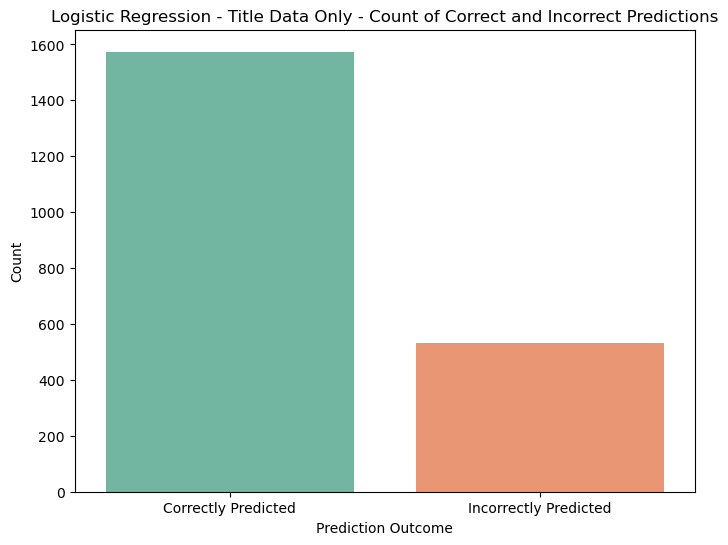

Accuracy: 74.77%


In [22]:
import seaborn as sns
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a confusion matrix
conf_matrix = confusion_matrix(results_df['Actual'], results_df['Predicted'])

# Map the actual and predicted labels to "Correctly Predicted" and "Incorrectly Predicted"
results_df['Outcome'] = results_df.apply(lambda row: 'Correctly Predicted' if row['Actual'] == row['Predicted'] else 'Incorrectly Predicted', axis=1)

# Plot the count of correct and incorrect predictions
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=results_df, palette='Set2')

plt.title('Logistic Regression - Title Data Only - Count of Correct and Incorrect Predictions')
plt.xlabel('Prediction Outcome')
plt.ylabel('Count')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')